In [1]:
#| echo: false
#| warning: false

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn import linear_model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
import matplotlib_inline.backend_inline

sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

Import `Default` dataset

In [2]:
df_default = pd.read_csv("../Data/Default.csv")

In [3]:
df_default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


Transform categorical variables into binary

In [4]:
df_default_binary = df_default.copy()
df_default_binary['default'] = df_default_binary['default'].map({'No':0, 'Yes':1})
df_default_binary['student'] = df_default_binary['student'].map({'No':0, 'Yes':1})

In [5]:
df_default_binary.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


## 4.1 Logistic Regression

### 4.1.1 Estimate Logit Model — Statmodels

In [6]:
mod1 = smf.glm("default ~ balance", data = df_default_binary, family = sm.families.Binomial()).fit()

In [7]:
print(mod1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                default   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9998
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -798.23
Date:                Mon, 23 Jan 2023   Deviance:                       1596.5
Time:                        13:53:01   Pearson chi2:                 7.15e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1240
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.6513      0.361    -29.491      0.0

Alternatively, it's possible to call `logit()` model directly

In [8]:
mod1 = smf.logit("default ~ balance", data = df_default_binary).fit()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


In [9]:
print(mod1.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Mon, 23 Jan 2023   Pseudo R-squ.:                  0.4534
Time:                        13:53:01   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006

Possibly complete quasi-separation: A fraction 0.13

Predict default probability for an individual with `balance` of $1,000 and $2,000

In [10]:
pred_mod1 = mod1.predict(pd.DataFrame({'balance': [1000, 2000]}))

print(f"The probability of default for a balance of 1000 is {pred_mod1[0]:0.3%}")
print(f"The probability of default for a balance of 2000 is {pred_mod1[1]:0.1%}")

The probability of default for a balance of 1000 is 0.575%
The probability of default for a balance of 2000 is 58.6%


Estimate a model with binary dependent variable `student`

In [11]:
mod2 = smf.logit("default ~ student", data = df_default_binary).fit()

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


In [12]:
print(mod2.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Mon, 23 Jan 2023   Pseudo R-squ.:                0.004097
Time:                        13:53:01   Log-Likelihood:                -1454.3
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                 0.0005416
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.5041      0.071    -49.554      0.000      -3.643      -3.366
student        0.4049      0.115      3.520      0.000       0.179       0.630


Predict default probability for a `student`

In [13]:
pred_mod2 = mod2.predict(pd.DataFrame({'student': [0, 1]}))

print(f"The probability of default for a non-student is {pred_mod2[0]:0.2%}")
print(f"The probability of default for a student is {pred_mod2[1]:0.2%}")

The probability of default for a non-student is 2.92%
The probability of default for a student is 4.31%


### 4.1.2 Estimate Logit Model — Scikit-learn

In [14]:
#| output: false
#| warning: false

# create feature and target vectors
X1 = df_default_binary['balance'].values.reshape(-1,1)
y1 = df_default_binary['default'].ravel()

# create a logistic regression model
logreg1 = linear_model.LogisticRegression(solver='newton-cg')
logreg1.fit(X1, y1)

# predict probabilities
logreg1_pred = logreg1.predict_proba(X1)

Create dataframe with predicted values

In [15]:
df_pred = pd.DataFrame({'Balance': X1.flatten(), 'Predicted': logreg1_pred[:,1]})

Plot predicted values

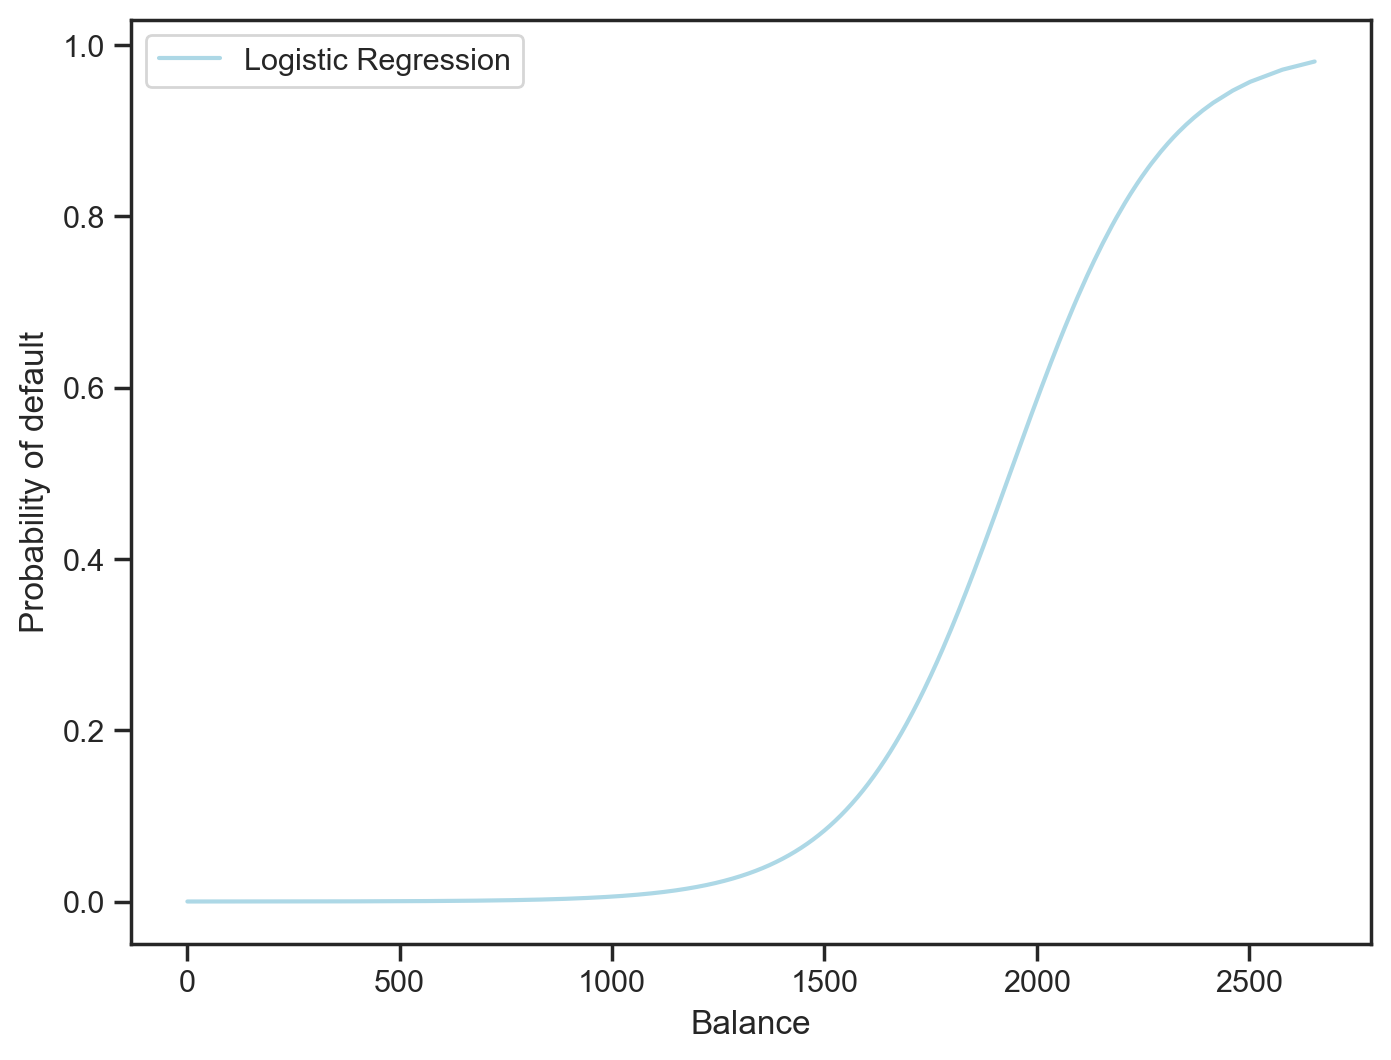

In [16]:
fig, ax = plt.subplots(figsize = (8, 6))
sns.lineplot(x = 'Balance', y = 'Predicted', data = df_pred, color = 'lightblue', label = 'Logistic Regression')
ax.set_ylabel('Probability of default')
plt.show()

Predict default probability for an individual with `balance` of $1,000 and $2,000

In [17]:
logreg1_pred = logreg1.predict_proba(np.array([1000, 2000]).reshape(-1,1))

print(f"The probability of default for a balance of 1000 is {logreg1_pred[0,1]:0.3%}")
print(f"The probability of default for a balance of 2000 is {logreg1_pred[1,1]:0.1%}")

The probability of default for a balance of 1000 is 0.575%
The probability of default for a balance of 2000 is 58.6%


Estimate a model with binary dependent variable `student`

In [18]:
#| output: false
#| warning: false

# create feature and target vectors
X2 = df_default_binary['student'].values.reshape(-1,1)
y2 = df_default_binary['default'].ravel()

# create a logistic regression model
logreg2 = linear_model.LogisticRegression(solver='newton-cg')
logreg2.fit(X2, y2)

LogisticRegression(solver='newton-cg')

Predict default probability for a `student`

In [19]:
logreg2_pred = logreg2.predict_proba(np.array([0, 1]).reshape(-1,1))

print(f"The probability of default for a non-student is {logreg2_pred[0,1]:0.2%}")
print(f"The probability of default for a student is {logreg2_pred[1,1]:0.2%}")

The probability of default for a non-student is 2.93%
The probability of default for a student is 4.30%


### 4.2.1 Estimate Multiple Logit Model — Statmodels

In [20]:
mod3 = smf.logit("default ~ balance + income + student", data = df_default_binary).fit()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


In [21]:
print(mod3.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Mon, 23 Jan 2023   Pseudo R-squ.:                  0.4619
Time:                        13:53:10   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.8690      0.492    -22.079      0.000     -11.834      -9.904
balance        0.0057      0.000     24.737      0.000       0.005       0.006
income      3.033e-06    8.2e-06      0.370      0.7

Predict default probability for a `student` with a card `balance` of $1,500 and `income` of $40,000

In [22]:
pred_mod3 = mod3.predict(pd.DataFrame({'balance': [1500, 1500], 'income': [40000, 40000], 'student': [1, 0]}))

print(f"The probability of default for a student with a balance of 1500 and an income of 40000 is {pred_mod3[0]:0.2%}")
print(f"The probability of default for a non-student with a balance of 1500 and an income of 40000 is {pred_mod3[1]:0.2%}")

The probability of default for a student with a balance of 1500 and an income of 40000 is 5.79%
The probability of default for a non-student with a balance of 1500 and an income of 40000 is 10.50%


Plot `Default Rate` and `Credid Card Balance`

In [23]:
# estimate the model

mod4 = smf.logit("default ~ balance + student", data = df_default_binary).fit()

# get the predicted probabilities for students and non-students

df_len = len(df_default_binary['balance'].values)

df_student = pd.DataFrame({'balance': df_default_binary['balance'].values, 'student': np.repeat(1, df_len)})
df_nonstudent = pd.DataFrame({'balance': df_default_binary['balance'].values, 'student': np.repeat(0, df_len)})

df_student["prob"] = mod4.predict(df_student.copy())
df_nonstudent["prob"] = mod4.predict(df_nonstudent.copy())

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10


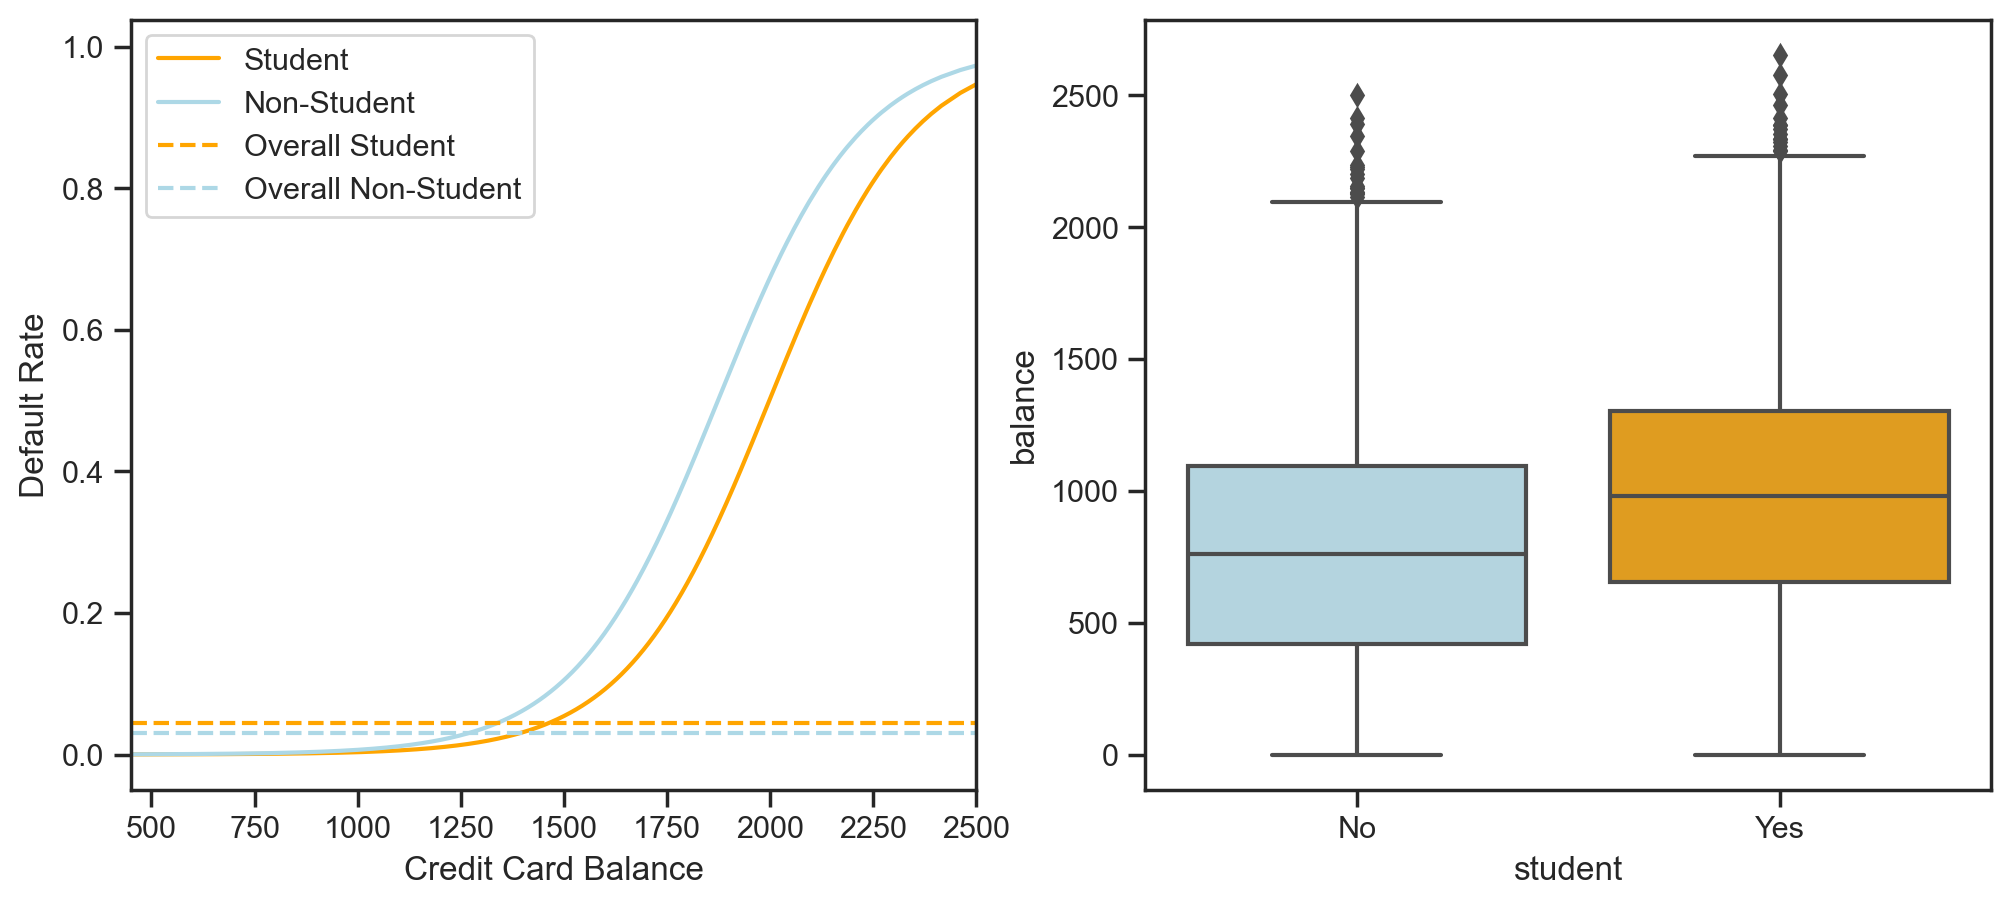

In [24]:
# plot the predicted probabilities

# creating plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
sns.lineplot(x = "balance", y = "prob", data = df_student, label = "Student", ax=ax1, color='orange')
sns.lineplot(x = "balance", y = "prob", data = df_nonstudent, label = "Non-Student", ax=ax1, color='lightblue')
ax1.hlines(127/2817, colors='orange', label='Overall Student',
           xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dashed')
ax1.hlines(206/6850, colors='lightblue', label='Overall Non-Student',
           xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dashed')
ax1.set_ylabel('Default Rate')
ax1.set_xlabel('Credit Card Balance')
ax1.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.])
ax1.set_xlim(450,2500)
ax1.legend(loc=2)

# Right plot
c_palette = {'No':'lightblue', 'Yes':'orange'}
sns.boxplot(x='student', y='balance', data=df_default, orient='v', ax=ax2,  palette = c_palette)
plt.show()

### 4.2.2 Estimate Multiple Logit Model — Scikit-learn

In [25]:
#| output: false
#| warning: false

# create feature and target vectors
X3 = df_default_binary.iloc[:, 1:].values.reshape(-1,3)
y3 = df_default_binary['default'].ravel()

# create a logistic regression model
logreg3 = linear_model.LogisticRegression(random_state=0, solver='lbfgs', max_iter=100)
logreg3.fit(X3, y3)

LogisticRegression(random_state=0)

Predict default probability for a `student` with a card `balance` of $1,500 and `income` of $40,000

In [26]:
logreg3_pred = logreg3.predict_proba(np.array([1500, 40000, 1]).reshape(-1,3))

print(f"The probability of default for a student with a balance of 1500 and an income of 40000 is {logreg3_pred[0,1]:0.2%}")

The probability of default for a student with a balance of 1500 and an income of 40000 is 0.00%


## 4.3 Linear Discriminant Analysis

Unfortunately, LDA in Python is only possible via `Scikit-learn`

In [27]:
#| output: false
#| warning: false

ldamod1 = LinearDiscriminantAnalysis()

ldamod1.fit(X3, y3)

LinearDiscriminantAnalysis()

Get predicted values

In [28]:
y_hat = ldamod1.predict(X3)

df_lda_pred = pd.DataFrame({'Actual': y3, 'Predicted': y_hat})

Create confusion matrix

In [29]:
df_lda_pred.groupby(['Predicted','Actual']).size().unstack('Actual')

Actual,0,1
Predicted,,
0,9645,254
1,22,79


You can use custom probability threshold. Say, it's equal to 20%

In [30]:
threshold = 0.2
y_hat2 = ldamod1.predict_proba(X3)

df_lda_pred2 = pd.DataFrame({'Actual': y3, 'Predicted': y_hat2[:,1] > threshold})

df_lda_pred2.groupby(['Predicted','Actual']).size().unstack('Actual')

Actual,0,1
Predicted,,
False,9435,140
True,232,193


## 4.4 Lab: Classification Methods

### 4.4.1 The Stock Market Data

Load Stock Market data

In [31]:
df_stock = pd.read_csv("../Data/Smarket.csv")

In [32]:
df_stock.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [33]:
df_stock.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


Transform `Direction` to the binary variable

In [34]:
df_stock['Direction'] = df_stock['Direction'].map({'Up': 1, 'Down': 0})

### 4.4.2 Logistic Regression

In [35]:
mod5 = smf.logit("Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume", data = df_stock).fit()

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4


In [36]:
print(mod5.summary())

                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Mon, 23 Jan 2023   Pseudo R-squ.:                0.002074
Time:                        13:53:30   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7319
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.050     -1.457      0.145      -0.171       0.025
Lag2          -0.0423      0.050     -0.845      0.3

Get predicted classes

In [37]:
df_stock['Direction_prob'] = mod5.predict(df_stock.iloc[:, 1:7])
df_stock['Direction_pred'] = df_stock['Direction_prob'].apply(lambda x: 1 if x > 0.5 else 0)

Build a confusion matrix

In [38]:
df_stock.groupby(['Direction_pred','Direction']).size().unstack('Direction')

Direction,0,1
Direction_pred,,
0,145,141
1,457,507


Re-estimate the model using training data (up to 2004)

In [39]:
df_stock_train = df_stock[df_stock['Year'] < 2005]

In [40]:
df_stock_train.tail()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Direction_prob,Direction_pred
993,2004,0.046,0.342,0.904,0.038,-0.749,0.9561,-0.431,0,0.497080,0
994,2004,-0.431,0.046,0.342,0.904,0.038,0.9220,0.715,1,0.510266,1
995,2004,0.715,-0.431,0.046,0.342,0.904,0.9830,-0.007,0,0.496539,0
996,2004,-0.007,0.715,-0.431,0.046,0.342,0.9259,0.008,1,0.492213,0
997,2004,0.008,-0.007,0.715,-0.431,0.046,0.8298,-0.134,0,0.497617,0


In [41]:
mod6 = smf.logit("Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume", data = df_stock_train).fit()

Optimization terminated successfully.
         Current function value: 0.691936
         Iterations 4


In [42]:
df_stock_test = df_stock.copy()[df_stock['Year'] == 2005]

df_stock_test['Direction_prob'] = mod6.predict(df_stock_test.iloc[:, 1:7])
df_stock_test['Direction_pred'] = df_stock_test['Direction_prob'].apply(lambda x: 1 if x > 0.5 else 0)

df_stock_test.groupby(['Direction_pred','Direction']).size().unstack('Direction')

Direction,0,1
Direction_pred,,
0,77,97
1,34,44


Estimate a model only with `Lag1` and `Lag2`

In [43]:
mod7 = smf.logit("Direction ~ Lag1 + Lag2", data = df_stock_train).fit()

df_stock_test['Direction_prob'] = mod7.predict(df_stock_test.iloc[:, 1:3])
df_stock_test['Direction_pred'] = df_stock_test['Direction_prob'].apply(lambda x: 1 if x > 0.5 else 0)

df_stock_test.groupby(['Direction_pred','Direction']).size().unstack('Direction')

Optimization terminated successfully.
         Current function value: 0.692085
         Iterations 3


Direction,0,1
Direction_pred,,
0,35,35
1,76,106


### 4.4.3 Linear Discriminant Analysis

In [44]:
#| output: false
#| warning: false

# create train feature and target vectors
X4_train = df_stock_train.iloc[:, 1:3].values
y4_train = df_stock_train['Direction'].ravel()

# create test feature and target vectors
X4_test = df_stock_test.iloc[:, 1:3].values
y4_test = df_stock_test['Direction'].ravel()


ldamod2 = LinearDiscriminantAnalysis()

ldamod2.fit(X4_train, y4_train)

LinearDiscriminantAnalysis()

In [45]:
y4_hat = ldamod2.predict(X4_test)

df_stock_lda2_pred = pd.DataFrame({'Actual': y4_test, 'Predicted': y4_hat})

df_stock_lda2_pred.groupby(['Predicted','Actual']).size().unstack('Actual')

Actual,0,1
Predicted,,
0,35,35
1,76,106


### 4.4.4 Quadratic Discriminant Analysis

In [46]:
#| output: false
#| warning: false

qdamod = QuadraticDiscriminantAnalysis()

qdamod.fit(X4_train, y4_train)

QuadraticDiscriminantAnalysis()

In [47]:
y_hat = qdamod.predict(X4_test)

df_stock_qda_pred = pd.DataFrame({'Actual': y4_test, 'Predicted': y_hat})

df_stock_qda_pred.groupby(['Predicted','Actual']).size().unstack('Actual')

Actual,0,1
Predicted,,
0,30,20
1,81,121


### 4.4.5 Naive Bayes

In [48]:
gnbmod = GaussianNB()
y_hat = gnbmod.fit(X4_train, y4_train).predict(X4_test)

df_stock_gmb_pred = pd.DataFrame({'Actual': y4_test, 'Predicted': y_hat})
df_stock_gmb_pred.groupby(['Predicted','Actual']).size().unstack('Actual')

Actual,0,1
Predicted,,
0,29,20
1,82,121


### 4.4.6 K-Nearest Neighbors

Estimate KNN classifier with $K = 1$

In [49]:
knnmod = neighbors.KNeighborsClassifier(n_neighbors = 1)
y_hat = knnmod.fit(X4_train, y4_train).predict(X4_test)

df_stock_knn_pred = pd.DataFrame({'Actual': y4_test, 'Predicted': y_hat})
df_stock_knn_pred.groupby(['Predicted','Actual']).size().unstack('Actual')

Actual,0,1
Predicted,,
0,43,58
1,68,83


$K = 3$

In [50]:
knnmod2 = neighbors.KNeighborsClassifier(n_neighbors = 3)
y_hat = knnmod2.fit(X4_train, y4_train).predict(X4_test)

df_stock_knn2_pred = pd.DataFrame({'Actual': y4_test, 'Predicted': y_hat})
df_stock_knn2_pred.groupby(['Predicted','Actual']).size().unstack('Actual')

Actual,0,1
Predicted,,
0,48,55
1,63,86


### 4.4.7 Poisson Regression

Import `Bikeshare` dataset

In [51]:
df_bike = pd.read_csv("../Data/Bikeshare.csv")

In [52]:
df_bike.head()

,season,mnth,day,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,bikers
0,1,Jan,1,0,0,6,0,clear,0.24,0.2879,0.81,0.0,3,13,16
1,1,Jan,1,1,0,6,0,clear,0.22,0.2727,0.80,0.0,8,32,40
2,1,Jan,1,2,0,6,0,clear,0.22,0.2727,0.80,0.0,5,27,32
3,1,Jan,1,3,0,6,0,clear,0.24,0.2879,0.75,0.0,3,10,13
4,1,Jan,1,4,0,6,0,clear,0.24,0.2879,0.75,0.0,0,1,1


First, fit the Linear Regression

In [53]:
mod8 = smf.ols("bikers ~ C(mnth, Treatment(reference='Jan')) + hr + workingday + temp + weathersit", data = df_bike).fit()

In [54]:
print(mod8.summary().tables[0])
print(mod8.summary().tables[1])

                            OLS Regression Results                            
Dep. Variable:                 bikers   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     291.1
Date:                Mon, 23 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:53:32   Log-Likelihood:                -52635.
No. Observations:                8645   AIC:                         1.053e+05
Df Residuals:                    8627   BIC:                         1.054e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

Second, estimate Poisson Regression

In [55]:
mod9 = smf.glm("bikers ~ C(mnth, Treatment(reference='Jan')) + hr + workingday + temp + weathersit", data = df_bike, family = sm.families.Poisson()).fit()

In [56]:
print(mod9.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 bikers   No. Observations:                 8645
Model:                            GLM   Df Residuals:                     8627
Model Family:                 Poisson   Df Model:                           17
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.4404e+05
Date:                Mon, 23 Jan 2023   Deviance:                   6.3504e+05
Time:                        13:53:34   Pearson chi2:                 6.83e+05
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

**End of Classification Methods practice code**